In [3]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, RepeatedKFold, ShuffleSplit
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
# Enable inline plots
%matplotlib inline

## Выбор датасета и его исследование

In [5]:
data = pd.read_csv('heart.csv', sep=',')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
data.shape 

(303, 14)

In [7]:
data.dtypes 

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
data.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 3. Разделение выборки на обучающую и тестовую.

In [9]:
 # Перейдем к разделению выборки на обучающую и тестовую.
X = data.drop('target',axis = 1).values 
y = data['target'].values 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.35, random_state=1)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(196, 13)
(107, 13)
(196,)
(107,)


## 4.Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью трех подходящих для задачи метрик.

In [12]:
def test_model(model):
    print("mean_absolute_error:",
    mean_absolute_error(y_test, model.predict(X_test)))
    print("median_absolute_error:",
    median_absolute_error(y_test, model.predict(X_test)))
    print("r2_score:",
    r2_score(y_test, model.predict(X_test)))

In [13]:
reg_5 = KNeighborsRegressor(n_neighbors=5)
reg_5.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [14]:
# Проверим метрики построенной модели
test_model(reg_5)

mean_absolute_error: 0.42616822429906537
median_absolute_error: 0.4
r2_score: -0.01218245614035074


## 5. Постройте модель и оцените качество модели с использованием кросс-валидации. Проведите эксперименты с тремя различными стратегиями кросс-валидации.

## K-Fold

In [15]:
scores = cross_val_score(KNeighborsRegressor(n_neighbors=5), X, y, cv=KFold(n_splits=10), scoring="r2")
print(scores)
print(scores.mean(), "±", scores.std())

[0.         0.         0.         0.         0.         0.16666667
 0.         0.         0.         0.        ]
0.016666666666666653 ± 0.04999999999999995


## Repeated K-Fold

In [16]:
 scores = cross_val_score(KNeighborsRegressor(n_neighbors=5), X, y, cv=RepeatedKFold(n_splits=5, n_repeats=2),
scoring="r2")
print(scores)
print(scores.mean(), "±", scores.std())


[-0.17802151 -0.10305011  0.01238095  0.3352614   0.05714286 -0.03857759
  0.02131868  0.08034858 -0.008       0.06650999]
0.024531326401118825 ± 0.1284515912142582


## Shuffle Split

In [17]:
scores = cross_val_score(KNeighborsRegressor(n_neighbors=5), X, y, cv=ShuffleSplit(n_splits=10), scoring="r2")
print(scores)
print(scores.mean(), "±", scores.std())

[-0.03333333  0.08324786 -0.17111111 -0.09859649  0.15266667 -0.20290598
  0.40084034  0.008       0.05145299 -0.14418182]
0.004607912074165765 ± 0.1718953172265004


## 6. Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.

In [18]:
n_range = np.array(range(1, 14, 2))
tuned_parameters = [{'n_neighbors': n_range}]
n_range

array([ 1,  3,  5,  7,  9, 11, 13])

In [19]:
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters,
cv=ShuffleSplit(n_splits=10), scoring="r2",
return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_params_

{'n_neighbors': 13}

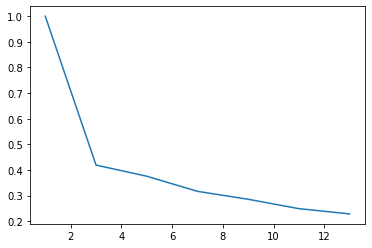

In [20]:
plt.plot(n_range, gs.cv_results_["mean_train_score"])

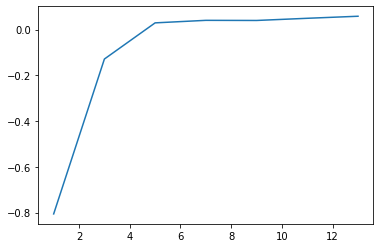

In [21]:
plt.plot(n_range, gs.cv_results_["mean_test_score"])

## 7. Повторите пункт 4 для найденного оптимального значения гиперпараметра K. Сравните качество полученной модели с качеством модели, полученной в пункте 4.

In [22]:
reg = KNeighborsRegressor(**gs.best_params_)
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 0.43278217109992817
median_absolute_error: 0.38461538461538464
r2_score: 0.05096231703519161


## 8. Постройте кривые обучения и валидации.

In [23]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None):
    train_sizes=np.linspace(.1, 1.0, 5)
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from '/home/denis/mllabs/env/lib/python3.6/site-packages/matplotlib/pyplot.py'>

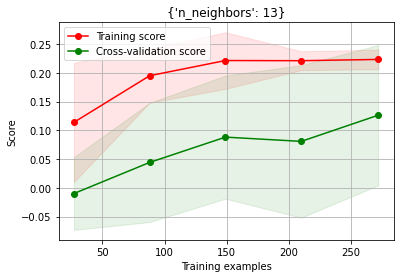

In [24]:
plot_learning_curve(reg, str(gs.best_params_), X, y,
cv=ShuffleSplit(n_splits=10))

In [25]:
def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv, scoring="accuracy"):
    train_scores, test_scores = validation_curve(
    estimator, X, y, param_name=param_name,
    param_range=param_range,
    cv=cv, scoring=scoring, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
    color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, alpha=0.2,
    color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean,
    label="Cross-validation score",
    color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std, alpha=0.2,
    color="navy", lw=lw)
    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from '/home/denis/mllabs/env/lib/python3.6/site-packages/matplotlib/pyplot.py'>

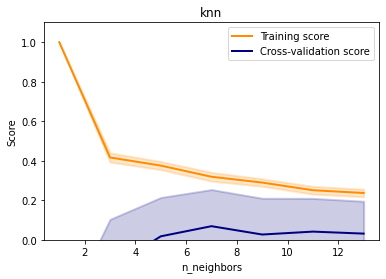

In [26]:
plot_validation_curve(KNeighborsRegressor(), "knn", X, y,
param_name="n_neighbors", param_range=n_range,
cv=ShuffleSplit(n_splits=10), scoring="r2")